<a href="https://colab.research.google.com/github/Nurlyssultan/ML-DS-Cheat-Sheet/blob/main/Data_and_Sampling_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st

In [3]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Statistics with Python 2/Inferential Statistics/Descriptive Statistics/Baseball.csv")
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [4]:
df.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


 ## Random Sampling
 #### A sample is a subset from a larger data set - population;
 #### A random sampling is a process that represents each member of population at random.

 #### Bias - systematic error
 #### Sample bias - misrepresentation of population



## Standard Error
$$SE = \frac{s}{\sqrt{n}}$$

where:

* $SE$ is the standard error of the mean
* $s$ is the sample standard deviation
* $n$ is the sample size

The standard error is a measure of the variability of the sample mean. It is used to estimate the accuracy of the sample mean as an estimate of the population mean.

The standard error formula can be derived using the following steps:

1. The sample variance is calculated as follows:

$$s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2$$

where:

* $s^2$ is the sample variance
* $x_i$ is the $i$th observation in the sample
* $\bar{x}$ is the sample mean

2. The sample standard deviation is calculated as follows:

$$s = \sqrt{s^2}$$

3. The standard error is calculated as follows:

$$SE = \frac{s}{\sqrt{n}}$$

The standard error is a valuable tool for understanding the accuracy of a sample mean. It can be used to construct confidence intervals for the population mean and to test hypotheses about the population mean.

## Normal Distribution

<Axes: ylabel='Density'>

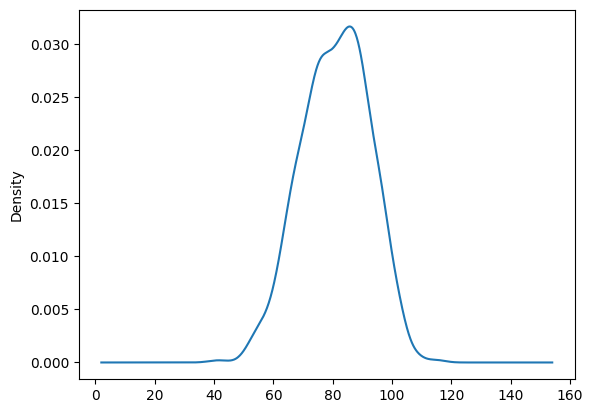

In [5]:
# Plotting W
df.W.plot.density()

<Axes: ylabel='Density'>

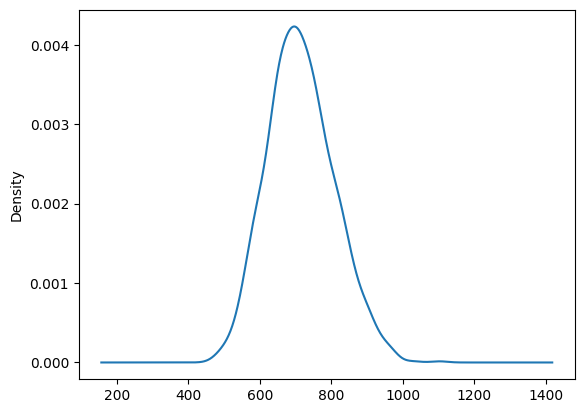

In [6]:
# Density plot for RAs
df.RA.plot.density()

In [8]:
# Do the 68-95-99 check, but use a for plot
for i in range(1,7):
  print(df.loc[(df.RA <= df.RA.mean() + i * df.RA.std()) &
        (df.RA >= df.RA.mean() - i * df.RA.std())].RA.count()/df.RA.count() * 100)

67.4512987012987
95.94155844155844
99.83766233766234
99.91883116883116
100.0
100.0


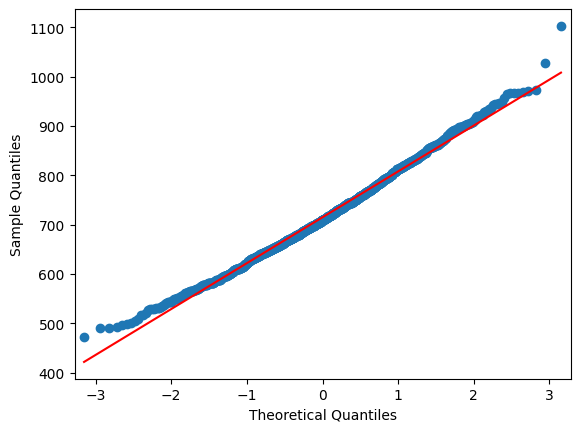

In [9]:
## QQ-lot
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(df.RA, line='s')
plt.show()

<Axes: xlabel='RA', ylabel='Count'>

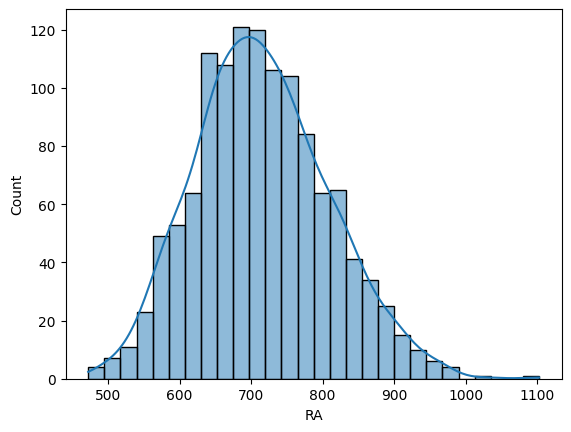

In [13]:
# normal distributions plot
sns.histplot(df.RA, kde=True)

<Axes: xlabel='RA', ylabel='Density'>

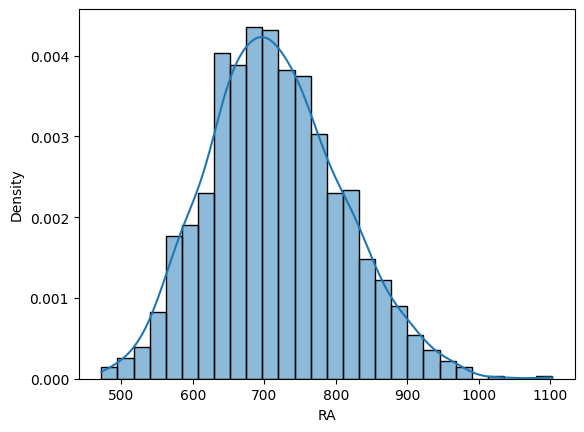

In [15]:
# Student's t-Distribution plot
sns.histplot(df.RA, kde=True, stat="density", common_norm=False)

In [17]:
# binomial distribution
from scipy import stats
print(stats.binom.cdf(2, n=5, p=0.1))

0.99144


In [20]:
# the binomial distribution is the frequency of the number of successes (x) in a given number of trials (n) with specified probabilities (p)
# if the probability of a click converting to a sale is 0.02, what is the probability of observing 0 sales in 200 clicks?
stats.binom.pmf(0, n=200, p=0.02)

0.017587946605721567

In [23]:
stats.binom.pmf(2,5,0.1)

0.07289999999999992

In [24]:
# chi-square distribution
from scipy.stats import chi2
chi2.cdf(x=3, df=df.RA.count())


0.0

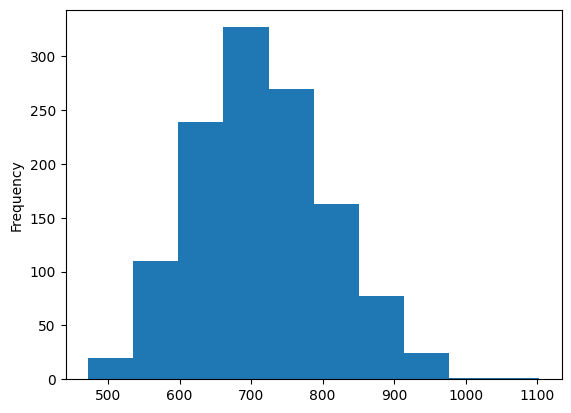

In [25]:
# Poisson Distributions
sample = stats.poisson.rvs(2, size=100)

pd.Series(df.RA).plot.hist()
plt.show()


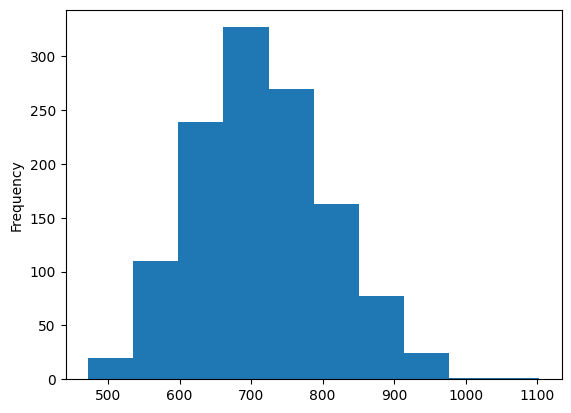

In [26]:
# Exponential Distribution plot
sample = stats.expon.rvs(size=100)

pd.Series(df.RA).plot.hist()
plt.show()


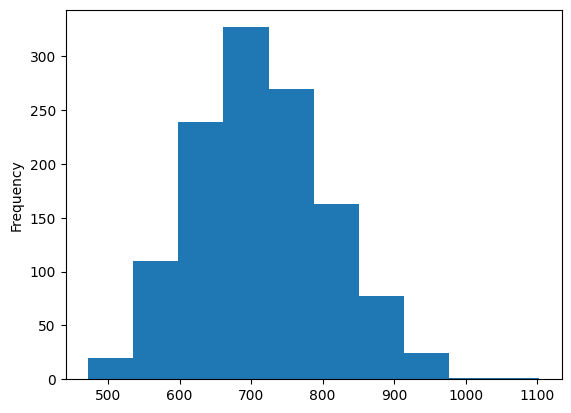

In [28]:
# Weibull Distribution plot
sample = stats.weibull_min.rvs(2, size=100)

pd.Series(df.RA).plot.hist()
plt.show()
